# Stochastic Model 04: Ověření modelu (Model Verification)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy
#%pip install seaborn matplotlib

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Vstupní data

In [3]:
# analytické stacionární rozdělení (např. z řešení pi*P = pi)
pi_analyt = np.array([
    0.019923, 0.019897, 0.079054, 0.039421,
    0.058894, 0.250823, 0.076763, 0.245195,
    0.023120, 0.115598, 0.016457, 0.054855
])

# Empirické rozdělení
empirical_pi = np.array([
    0.019898, 0.019866, 0.079479, 0.039166,
    0.058999, 0.251703, 0.076208, 0.244172,
    0.016793, 0.110242, 0.031284, 0.05219
])

# empirické rozdělení ze simulace (např. z histogramu stavů)
pi_sim = empirical_pi

### Maximální absolutní odchylka

In [4]:
# výpočet maximální absolutní odchylky mezi analytickým a simulovaným rozdělením

max_abs_dev = np.max(np.abs(pi_sim - pi_analyt))

print("Maximální absolutní odchylka:")
print(round(max_abs_dev, 6))

Maximální absolutní odchylka:
0.014827


### Výpočet RMSE

In [5]:
# výpočet střední kvadratické chyby (Root Mean Square Error)

rmse = np.sqrt(
    np.mean(
        (pi_sim - pi_analyt)**2
    )
)

print("RMSE:")
print(round(rmse, 6))

RMSE:
0.004984


### Výpočet KL divergence

In [6]:
# malá konstanta pro zamezení log(0)
epsilon = 1e-12

# výpočet Kullbackovy–Leiblerovy divergence
kl_div = np.sum(
    pi_analyt * np.log(
        (pi_analyt + epsilon) / (pi_sim + epsilon)
    )
)

print("KL divergence:")
print(round(kl_div, 6))

KL divergence:
0.005524


### Shrnutí výsledků

In [7]:
print("\n===== VERIFIKACE MODELU =====")
print(f"Max |pi_sim - pi_analyt| = {max_abs_dev:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"D_KL = {kl_div:.6f}")


===== VERIFIKACE MODELU =====
Max |pi_sim - pi_analyt| = 0.014827
RMSE = 0.004984
D_KL = 0.005524


### Heatmapa rozdílu mezi analytickým a simulovaným rozdělením

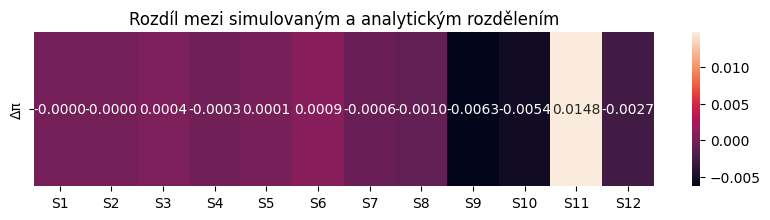

In [9]:
states = np.arange(1,13)
width = 0.35

diff = (pi_sim - pi_analyt).reshape(1,-1)

plt.figure(figsize=(10,2))

sns.heatmap(diff,
            annot=True,
            fmt=".4f",
            xticklabels=[f"S{i}" for i in states],
            yticklabels=["Δπ"],
            cbar=True)

plt.title("Rozdíl mezi simulovaným a analytickým rozdělením")

plt.show()

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-26 | 1.1 | Vjačeslav Usmanov| added SM_04_Model_Verification.ipynb |
| 2026-02-16 | 1.2 | Vjačeslav Usmanov| changed SM_04_Model_Verification.ipynb |